In [1]:
from statsbombpy import sb
import os
import glob
import pandas as pd
import numpy as np
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import log
import re

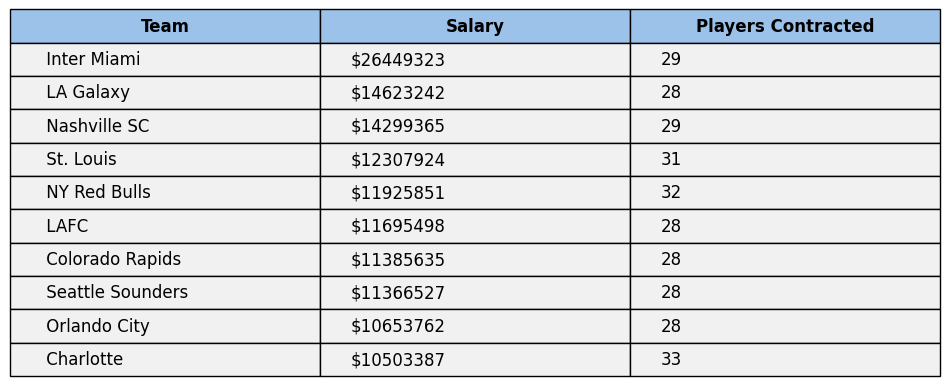

In [26]:
team_wages = pd.read_csv("mls-25-fbref-data-may-1/team-wages.csv")
team_wages["annual_wages_float"] = (
    team_wages["annual_wages"].str.extract(r'\$(\d+)').astype(float)
)
team_wages["annual_wages"] = (
    team_wages["annual_wages"].str.split(" ").str[0]
)

team_wages = team_wages.sort_values(by='annual_wages_float', ascending=False).head(10)

wages_table = team_wages[["team", "annual_wages", "players_contracted"]]

fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
# Hide axes for the table plot
ax.axis('off')

# Create the table with the team players and ratings
table = ax.table(cellText=wages_table.values,
                       colLabels=['Team', "Salary", "Players Contracted"],
                       cellLoc='left',
                       loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5,2)# table.auto_set_column_width(col=list(range(len(rapids_table.columns))))

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('#9CC2EA')
    else:
        cell.set_facecolor('#f1f1f2')

# plt.tight_layout()
plt.show()
